In [1]:
# text classification

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

In [3]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
# define all categories
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# trainig the data on these categories

train = fetch_20newsgroups(subset='train',categories=categories)
test = fetch_20newsgroups(subset = 'test',categories=categories)
print(train.data[5])
print(len(train.data))
#print(size_mb(data_train.data))
#print(size_mb(data_test.data))


From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [7]:
# importing package for Naive Bayes

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# creating a Naive Bayes model

model = make_pipeline(TfidfVectorizer(),MultinomialNB())

model.fit(train.data,train.target)

# creating the labels for test data

test_labels = model.predict(test.data)


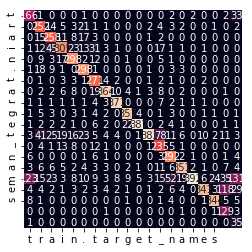

In [8]:
# Creating the confusiion matrix 

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target,test_labels)
sns.heatmap(mat.T,square = True,annot=True,fmt = 'd',cbar= False,xticklabels='train.target_names',
            yticklabels='train.target_names')
plt.xlabel = ('true label')
plt.ylabel = ('predicted label')

In [9]:
def predictCategory(s,train=train,model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [10]:
predictCategory('Jesus Christ')

'soc.religion.christian'

In [11]:
predictCategory('Prime Minister India')

'talk.politics.mideast'

In [12]:
## Support Vector machine clasifier


from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs

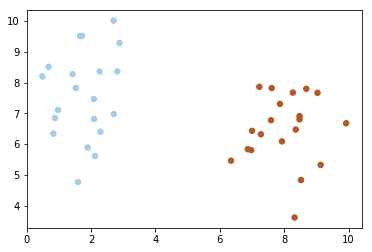

In [14]:
x,y = make_blobs(n_samples=40,centers=2,random_state=20)

# fit the svm model

clf = svm.SVC(kernel='linear',C=1)
clf.fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=30,cmap=plt.cm.Paired)
plt.show()

In [15]:
newData = [[3,4],[9,10]]
print(clf.predict(newData))

[0 1]


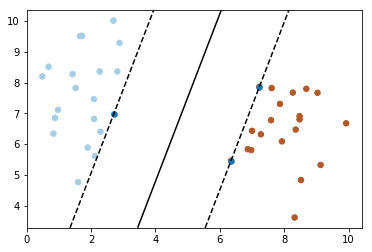

In [20]:
clf = svm.SVC(kernel='linear',C=1000)
clf.fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=30,cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create a gird to evaluate the model

xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)
yy,xx = np.meshgrid(yy,xx)
xy = np.vstack([xx.ravel(),yy.ravel()]).T
z = clf.decision_function(xy).reshape(xx.shape)

# plot decision boundries

ax.contour(xx,yy,z,colors='k',levels = [-1,0,1],
          linestyles = ['--','-','--'])

#plot support vectors

ax.scatter(clf.support_vectors_[:,0],
          clf.support_vectors_[:,1],s= 30)
plt.show()